### **Introdução**

#### **Contexto**

Bem-vindos a este projeto que nasceu da parceria com a **Ohli**, uma empresa revolucionária focada em transformar o autocuidado em um hábito diário na jornada do colaborador. Em um mundo BANI (Brittle, Anxious, Non-linear, Incomprehensible - frágil, ansioso, não linear, incompreensível), o cuidado integral com o indivíduo se torna um pilar essencial para o sucesso empresarial. A missão da Ohli é ser facilitadora dessa jornada de autocuidado, engajando-se na criação de ambientes de trabalho mais saudáveis e produtivos.

#### **Absenteísmo**

Antes de adentrarmos na análise, é importante entender o conceito de **absenteísmo**. Refere-se ao hábito de se ausentar frequentemente do trabalho, seja por doenças, problemas pessoais, ou outros motivos. O elevado índice de absenteísmo pode ser um indicativo de problemas sérios na empresa, como insatisfação dos colaboradores, condições de trabalho inadequadas, entre outros. Combatê-lo é vital, pois suas implicações no mundo dos negócios são extensas, afetando a produtividade, o moral da equipe e, consequentemente, os resultados da empresa.

#### **Sobre os Dados**

Neste notebook, vamos explorar uma série de datasets fornecidos, que incluem informações detalhadas sobre os colaboradores de uma organização, desde dados demográficos até hábitos diários e registros de afastamento. Com um total de cinco datasets distintos, temos um rico reservatório de dados para entender profundamente a jornada do colaborador.

#### **Plano de Análise**

Ao longo da nossa EDA (Análise Exploratória de Dados), iremos:

1. **Importar e limpar os dados**: garantindo que os dados estejam prontos para análise.
2. **Análise univariada e bivariada**: para entender a distribuição de variáveis individuais e as relações entre duas variáveis.
3. **Visualização de dados**: para fornecer insights visuais claros e informativos.
4. **Preparação para o Power BI**: Ao final, prepararemos os dados para a criação de dashboards informativos no Power BI, um passo crucial para visualizar nossas descobertas e compartilhá-las com stakeholders.


In [ ]:
# Importando bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Análise inicial

# Permitindo visualização de todas as colunas
pd.set_option('display.max_columns', None)


In [ ]:
# Lendo os arquivos depois do upload e armazenando em variáveis respectivas
colaboradores = pd.read_excel('Colaboradores.xlsx')
habitos = pd.read_excel('Hábitos.xlsx')
perguntas = pd.read_excel('Perguntas.xlsx')
respostas = pd.read_csv('Respostas.txt', delimiter=';')
afastamentos = pd.read_excel('Afastamentos.xlsx')

# Armazenando todos os dataframes em uma única variável
tabelas = [colaboradores, habitos, perguntas, respostas, afastamentos]

# Mostrando primeiras linhas e informações básicas sobre cada tabela
for tabela in tabelas:
  display(tabela.head())
  tabela.info()

  # Mostrando alguns valores únicos pra cada tabela
  for coluna in tabela.columns:
    print(f"Amostra de valores únicos para {coluna}: {tabela[coluna].unique()[:5]}")

,ID,Genero,EstadoCivil,Cargo,Departamento,DataContratacao,DataDemissao,SituacaoFolha,MotivoDesligamento,DataNascimento,Salario,Cidade,Estado
0,1,Masculino,Solteiro(a),ANALISTA DE TESTES SR,TECHNOLOGY,2020-08-06,2020-12-01,Demitido,Voluntário,1981-08-05,6000.00,BRASILIA,Distrito Federal
1,2,Masculino,Casado(a),OPERADOR DE ATENDIMENTO JR,COMERCIAL,2020-01-21,2020-05-20,Demitido,Empresa,1967-07-21,1300.00,RIO DE JANEIRO,Rio de Janeiro
2,3,Masculino,Solteiro(a),ANALISTA DESENVOLVEDOR III,TECHNOLOGY,2021-07-05,2022-04-22,Demitido,Voluntário,1986-09-26,7000.00,GOIANIA,Goiás
3,4,Masculino,Casado(a),TECNICO DE TELECOM PL,COMERCIAL,2021-09-13,NaT,Normal,NaN,1970-10-18,2060.64,VITORIA,Espírito Santo
4,5,Masculino,Casado(a),ANALISTA DESENVOLVEDOR SR,TECHNOLOGY,2019-01-21,2019-11-01,Demitido,Empresa,1971-01-26,6422.09,RIO DE JANEIRO,Rio de Janeiro


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  3646 non-null   int64         
 1   Genero              3646 non-null   object        
 2   EstadoCivil         3646 non-null   object        
 3   Cargo               3646 non-null   object        
 4   Departamento        3646 non-null   object        
 5   DataContratacao     3646 non-null   datetime64[ns]
 6   DataDemissao        2280 non-null   datetime64[ns]
 7   SituacaoFolha       3646 non-null   object        
 8   MotivoDesligamento  2275 non-null   object        
 9   DataNascimento      3646 non-null   datetime64[ns]
 10  Salario             3646 non-null   float64       
 11  Cidade              3403 non-null   object        
 12  Estado              3646 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(1), obje

,ID,Quantas horas costuma dormir por noite?,Quantas horas de tela em smartphones você costuma ter?,Quantos passos você costuma dar por dia?,Quantos litros de água costuma beber por dia?,O quanto você indicaria sua rotina alimentar para outra pessoa?,Com que frequencia consegue tirar tempo para hobbies?,Com que frequencia você se sente estressado?,Quantas vezes por mês você realiza atendimento com profissionais da saúde mental?,Com que frequencia costuma tirar um tempo para aprender algo novo?,Com que frequencia você tira tempo para refletir sobre seus planos e sentimentos?
0,1,De 6 a 9 horas,De 2 a 4 horas,Menos de 4 mil passos,"De 1,5 a 2,5 litros",Indicaria razoavelmente,As vezes,As vezes,1 vez,As vezes,As vezes
1,2,De 6 a 9 horas,Mais de 4 horas,Menos de 4 mil passos,"De 1,5 a 2,5 litros",Indicaria razoavelmente,As vezes,As vezes,1 vez,Quase sempre ou sempre,Nunca ou quase nunca
2,3,De 6 a 9 horas,De 2 a 4 horas,Menos de 4 mil passos,"De 1,5 a 2,5 litros",Não indicaria,Nunca ou quase nunca,Nunca ou quase nunca,1 vez,As vezes,As vezes
3,4,De 6 a 9 horas,Mais de 4 horas,Menos de 4 mil passos,"De 1,5 a 2,5 litros",Indicaria razoavelmente,Nunca ou quase nunca,Nunca ou quase nunca,1 vez,Quase sempre ou sempre,Nunca ou quase nunca
4,5,De 6 a 9 horas,De 2 a 4 horas,Menos de 4 mil passos,"De 1,5 a 2,5 litros",Indicaria razoavelmente,Nunca ou quase nunca,Nunca ou quase nunca,1 vez,Quase sempre ou sempre,Nunca ou quase nunca


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   ID                                                                                 3646 non-null   int64 
 1   Quantas horas costuma dormir por noite?                                            3646 non-null   object
 2   Quantas horas de tela em smartphones você costuma ter?                             3646 non-null   object
 3   Quantos passos você costuma dar por dia?                                           3646 non-null   object
 4   Quantos litros de água costuma beber por dia?                                      3646 non-null   object
 5   O quanto você indicaria sua rotina alimentar para outra pessoa?                    3646 non-null   object
 6   

,ID,Pergunta,Categoria
0,1,"Em uma escala de 0 a 10, quão provável você é ...",Autocuidado Físico
1,2,"Em uma escala de 0 a 10, quão provável você é ...",Autocuidado Físico
2,3,"Em uma escala de 0 a 10, quão provável você é ...",Autocuidado Físico
3,4,"Em uma escala de 0 a 10, quão provável você é ...",Autocuidado Físico
4,5,"Em uma escala de 0 a 10, quão provável você é ...",Autocuidado Físico


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         35 non-null     int64 
 1   Pergunta   35 non-null     object
 2   Categoria  35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes
Amostra de valores únicos para ID: [1 2 3 4 5]
Amostra de valores únicos para Pergunta: ['Em uma escala de 0 a 10, quão provável você é de recomendar sua alimentação diária em termos de equilíbrio e qualidade a outras pessoas?'
 'Em uma escala de 0 a 10, quão provável você é de recomendar sua rotina de exercícios para manter seu corpo ativo?'
 'Em uma escala de 0 a 10, quão provável você é de recomendar sua quantidade e qualidade de sono?'
 'Em uma escala de 0 a 10, quão provável você é de recomendar seus exames médicos de rotina e verificações de saúde?'
 'Em uma escala de 0 a 10, quão provável você é de recomendar sua forma de lidar com o

,DT,ID,IdPergunta,Nota
0,2021-09-01,106,1,"2,7600"
1,2021-09-01,106,2,"2,9325"
2,2021-09-01,106,3,"2,9325"
3,2021-09-01,106,4,"3,1050"
4,2021-09-01,106,5,"2,9325"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870715 entries, 0 to 1870714
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   DT          object
 1   ID          int64 
 2   IdPergunta  int64 
 3   Nota        object
dtypes: int64(2), object(2)
memory usage: 57.1+ MB
Amostra de valores únicos para DT: ['2021-09-01' '2021-10-01' '2021-11-01' '2021-12-01' '2022-01-01']
Amostra de valores únicos para ID: [106 107 108 109 110]
Amostra de valores únicos para IdPergunta: [1 2 3 4 5]
Amostra de valores únicos para Nota: ['2,7600' '2,9325' '3,1050' '3,2775' '2,9670']


,ID,Id_Colaborador,CID,Data_Inicio_Afastamento,Data_Fim_Afastamento
0,1,170,Z73.0,2019-01-10,2019-10-27
1,2,1784,Z73.0,2019-09-01,2019-07-06
2,3,1694,Z73.0,2019-08-29,2019-08-16
3,4,32,Z73.0,2019-08-30,2019-10-26
4,5,1702,Z73.0,2019-07-03,2019-04-30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1479 non-null   int64         
 1   Id_Colaborador           1479 non-null   int64         
 2   CID                      1479 non-null   object        
 3   Data_Inicio_Afastamento  1479 non-null   datetime64[ns]
 4   Data_Fim_Afastamento     1479 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 57.9+ KB
Amostra de valores únicos para ID: [1 2 3 4 5]
Amostra de valores únicos para Id_Colaborador: [ 170 1784 1694   32 1702]
Amostra de valores únicos para CID: ['Z73.0' 'F45.9' 'Z73.1']
Amostra de valores únicos para Data_Inicio_Afastamento: ['2019-01-10T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-08-29T00:00:00.000000000' '2019-08-30T00:00:00.000000000'
 '2019-07-03T00:00:00.000000

### Oportunidades de Limpeza de Dados

Durante a fase inicial de exploração dos dados, identifiquei algumas áreas que necessitam de limpeza e pré-processamento para garantir a integridade e a consistência dos dados. Abaixo, detalho as operações de limpeza identificadas para cada conjunto de dados:

#### **1-Colaboradores**
- **ID**
  - Certificar-se que não há IDs duplicados.
- **DataDemissão (2280 non-null) e MotivoDesligamento (2275 non-null)**
  - Tratar os valores nulos.
  - Certificar-se que não há demissões antes de contratações
- **Cidades (3403 non-null values de 3646 entradas)**
  - Padronizar todos os valores.
  - Tratar os valores nulos.
- **EstadoCivil**
  - Analisar entradas 'Não Identificado'.
- **Estado**
  - Padronização dos valores.
- **TempoEmpresa**
  - criar coluna tempo de empresa

#### **2-Hábitos**
- **Geral**
  - Aparentemente sem necessidade de limpeza, mas uma segunda revisão pode ser benéfica.

#### **3-Perguntas**
- **Geral**
  - Aparentemente sem necessidade de limpeza, mas vale uma revisão adicional para garantir.

#### **4-Respostas**
- **DT**
  - Transformar para tipo data.
  - Verificar se todas as respostas ocorream num intervalo possível pela data de contratação ou demissão
- **ID e IdPergunta**
  - Verificar integridade em relação aos IDs nas tabelas colaboradores e perguntas.
- **Nota**
  - Transformar em float.

#### **5-Afastamentos**
- **CID**
  - Adicionar uma coluna para descrever CID.
- **QuantidadeAfastamentos**
  - Criar a coluna quantidade de afastamentos
- **Assegurar integridade das datas**


## Limpeza na Tabela Colaboradores

In [ ]:
# Verificando o número de IDs únicos
print(f"Há {len(colaboradores['ID'].unique())} IDs únicos na tabela colaboradores")
print(f"O tamanaho da tabela é de {len(colaboradores)}")

Há 3646 IDs únicos na tabela colaboradores
O tamanaho da tabela é de 3646


In [ ]:
# Encontrando registros com DataDemissao não nula, mas MotivoDesligamento nulo
sem_motivo = colaboradores[(colaboradores['DataDemissao'].notnull()) & (colaboradores['MotivoDesligamento'].isnull())]

# Encontrando registros com MotivoDesligamento não nulo, mas DataDemissao nula
sem_data = colaboradores[(colaboradores['MotivoDesligamento'].notnull()) & (colaboradores['DataDemissao'].isnull())]

# Mostrando os resultados
print('Registros com DataDemissao não nula, mas MotivoDesligamento nulo:')
print(sem_motivo)

print('\nRegistros com MotivoDesligamento não nulo, mas DataDemissao nula:')
print(sem_data)


Registros com DataDemissao não nula, mas MotivoDesligamento nulo:
        ID     Genero       EstadoCivil                   Cargo Departamento  \
395    396  Masculino  Não Identificado  CONSULTOR FUNCIONAL SR      PRODUCT   
881    882  Masculino       Solteiro(a)  CONSULTOR FUNCIONAL SR      PRODUCT   
3198  3199  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   
3302  3303  Masculino  Não Identificado   ANALISTA DESENVOLV SR   TECHNOLOGY   
3361  3362  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
395       2021-04-28   2023-08-21        Normal                NaN   
881       2021-04-15   2023-08-18        Normal                NaN   
3198      2022-12-30   2023-07-31        Normal                NaN   
3302      2023-04-03   2023-07-10        Normal                NaN   
3361      2023-05-02   2023-08-04        Normal                NaN   

     DataNascimento  Salario    

**Todos** que possuem motivo de desligamento possuem data de demissão.

**5** colaboradores demitidos ainda não possuem motivo de desligamento. Seriam esses os demitidos mais recentes?

In [ ]:
colaboradores["DataDemissao"].sort_values(ascending=False)

3354   2023-08-25
3124   2023-08-25
3311   2023-08-24
2667   2023-08-24
2941   2023-08-22
          ...    
3641          NaT
3642          NaT
3643          NaT
3644          NaT
3645          NaT
Name: DataDemissao, Length: 3646, dtype: datetime64[ns]

**Não**, houveram outros demtidos mais recentemente, mas que já possuem um motivo de demissão.

Além disso, reparei que todos esses que não têm motivo, possuem Situação da Folha como **Normal**.

Vou analisar a relação a situação da folha e a data de demissão assim como com o motivo de desligamento.


In [ ]:
# Contando o número de demitidos com base na Situação da Folha
print(f"Com base na Situação da Folha, há {len(colaboradores[colaboradores['SituacaoFolha'] == 'Demitido'])} demitidos")

# Encontrando registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido
com_data = colaboradores[(colaboradores['DataDemissao'].notnull()) &
 (colaboradores['SituacaoFolha'] != 'Demitido')]

# Encontrando registros com MotivoDesligamento não nulo, mas SituacaoFolha diferente de Demitido
com_motivo = colaboradores[(colaboradores['MotivoDesligamento'].notnull()) &
 (colaboradores['SituacaoFolha'] != 'Demitido')]

# Mostrando os resultados
print('Registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido:')
print(com_data)

print('\nRegistros com MotivoDesligamento não nulo, mas SituacaoFolha diferente de Demitido')
print(com_motivo)

Com base na Situação da Folha, há 2275 demitidos
Registros com DataDemissao não nula, mas SituacaoFolha diferente de Demitido:
        ID     Genero       EstadoCivil                   Cargo Departamento  \
395    396  Masculino  Não Identificado  CONSULTOR FUNCIONAL SR      PRODUCT   
881    882  Masculino       Solteiro(a)  CONSULTOR FUNCIONAL SR      PRODUCT   
3198  3199  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   
3302  3303  Masculino  Não Identificado   ANALISTA DESENVOLV SR   TECHNOLOGY   
3361  3362  Masculino  Não Identificado  CONSULTOR FUNCIONAL PL      PRODUCT   

     DataContratacao DataDemissao SituacaoFolha MotivoDesligamento  \
395       2021-04-28   2023-08-21        Normal                NaN   
881       2021-04-15   2023-08-18        Normal                NaN   
3198      2022-12-30   2023-07-31        Normal                NaN   
3302      2023-04-03   2023-07-10        Normal                NaN   
3361      2023-05-02   2023-08-04        N

Há **5 registros** na base de dados com uma data de demissão não nula, mas com motivo de desligamento nulo e situação da folha normal.

**Todos os outros 2275 registros** de funcionários nessa base possuem dados mais consistentes (data de desligamento e motivo de desligamento não nulos, além de situação da folha como "Demitido").

Numa situação mais real, eu verificaria os dados com o departamento de RH. Mas para os fins desta análise, eu provavelmente não considerarei os colaboradores inconsistentes **(algo em torno de 0.2% do dataset)**, dependendo do que eu observar analisando o resto da base dados. Por hora, vou salvar os registros com cancelamentos inconsitentes em uma nova variável.

In [ ]:
# criando nova variával
ids_para_remover = [395, 881, 3198, 3302, 3361]

In [ ]:
# % Cidades não nulas
print(f'% de cidades nulas: {colaboradores["Cidade"].isnull().sum()/colaboradores["Cidade"].count() * 100: .2f}%')

% de cidades nulas:  7.14%


**7%** me parece razoável o suficiente para deixar o dataset como está. Não acho que isso interferirá a análise, mas posteriormente posso repensar minha decisão.

In [ ]:
# Padronizando cidades

# Deixando todas em maiúsculas:
colaboradores['Cidade'] = colaboradores['Cidade'].str.upper()
colaboradores['Cidade'].unique()

array(['BRASILIA', 'RIO DE JANEIRO', 'GOIANIA', 'VITORIA',
       'SANTO AMARO DA IMPERATRIZ', 'BRASÍLIA', 'VARGEM GRANDE PAULIS',
       'NITEROI', 'SAO PAULO', 'NOVA IGUACU', nan, 'MACAE',
       'RIO DAS OSTRAS', 'ÁGUAS LINDAS DE GOIÁ', 'NOVA LIMA', 'SOROCABA',
       'VALPARAISO DE GOIAS', 'PORTO ALEGRE', 'SAO GONCALO', 'ARARUAMA',
       'SANTOS', 'PIUMA', 'UBERLANDIA', 'MANAUS', 'SAO JOSE', 'FORMOSA',
       'SÃO PAULO', 'SAO JOAO DE MERITI', 'UNA', 'CABO FRIO', 'NOVO GAMA',
       'SANTA LUZIA', 'MACAÉ', 'OSASCO', 'DUQUE DE CAXIAS', 'CARAPEBUS',
       'LUZIANIA', 'AGUAS LINDAS DE GOIA', 'PELOTAS',
       'SANTO ANTONIO DO DES', 'CACHOEIRA DO SUL', 'INDAIATUBA',
       'SALVADOR', 'NATAL', 'TOLEDO', 'CAMPOS DOS GOYTACAZE', 'GUARULHOS',
       'MARICÁ', "SANTA BARBARA D'OEST", 'SAO BERNARDO DO CAMP',
       'BELO HORIZONTE', 'VITÓRIA', 'QUEIMADOS', 'TROMBUDO CENTRAL',
       'NITERÓI', 'CIDADE OCIDENTAL', 'MARICA', 'VALPARAÍSO DE GOIÁS',
       'BOM JARDIM', 'PAULISTA', 'ITABORAI

In [ ]:
# Criando um dicionário inicial de correções com a ajuda do ChatGPT 4.0
correcoes = {
    'BRASILIA': 'BRASÍLIA',
    'VARGEM GRANDE PAULIS': 'VARGEM GRANDE PAULISTA',
    'SAO PAULO': 'SÃO PAULO',
    'NOVA IGUACU': 'NOVA IGUAÇU',
    'MACAE': 'MACAÉ',
    'ÁGUAS LINDAS DE GOIÁ': 'ÁGUAS LINDAS DE GOIÁS',
    'SAO GONCALO': 'SÃO GONÇALO',
    'SAO JOAO DE MERITI': 'SÃO JOÃO DE MERITI',
    "SANTA BARBARA D'OEST": "SANTA BÁRBARA D'OESTE",
    'SAO BERNARDO DO CAMP': 'SÃO BERNARDO DO CAMPO',
    'VITORIA': 'VITÓRIA',
    'MARICA': 'MARICÁ',
    'ITABORAI': 'ITABORAÍ',
    'FLORIANOPOLIS': 'FLORIANÓPOLIS',
    'CAMPOS DOS GOYTACAZE': 'CAMPOS DOS GOYTACAZES',
    'RIBEIRAO DAS NEVES': 'RIBEIRÃO DAS NEVES',
    'NILOPOLIS': 'NILÓPOLIS',
    'CONCEICAO DE MACABU': 'CONCEIÇÃO DE MACABU',
    'RIBEIRAO PRETO': 'RIBEIRÃO PRETO',
    'CUBATAO': 'CUBATÃO',
    'MOJI DAS CRUZES': 'MOGI DAS CRUZES',
    'HORTOL NDIA': 'HORTOLÂNDIA',
    'EMBU-GUACU': 'EMBU-GUAÇU',
    'SUMARE': 'SUMARÉ',
    'SAO CAETANO DO SUL': 'SÃO CAETANO DO SUL',
    'SAO CARLOS': 'SÃO CARLOS',
    'FERRAZ DE VASCONCELO': 'FERRAZ DE VASCONCELOS',
    'SÃO BERNARDO DO CAMP': 'SÃO BERNARDO DO CAMPO',
    'UBERL NDIA': 'UBERLÂNDIA',
    'SÃO PAULO SÃO PAULO': 'SÃO PAULO',
    'MOGI GUACU': 'MOGI GUAÇU',
    'JABOATAO DOS GUARARA': 'JABOATÃO DOS GUARARAPES',
    'SAO JOSE DO RIO PARD': 'SÃO JOSÉ DO RIO PARDO',
    'APARECIDA DE GOIANIA': 'APARECIDA DE GOIÂNIA',
    'BARRA DO GARCAS': 'BARRA DO GARÇAS',
    'TERESOPOLIS': 'TERESÓPOLIS',
    'SANTO ANDRE': 'SANTO ANDRÉ',
    'SAO JOSE DOS CAMPOS': "SÃO JOSÉ DOS CAMPOS",
    'ARACAJU': "ARACAJÚ",
    "RIO DAS OSTRAS RIO D": "RIO DAS OSTRAS",
    "JUNDIAI": "JUNDIAÍ",
    "MATERLANDIA": "MATERLÂNDIA",
    "SANTANA DE PARNAIBA": "SANTANA DE PARNAÍBA"
}


In [ ]:
# Substituindo valores incorretos
colaboradores['Cidade'] = colaboradores['Cidade'].replace(correcoes)

**Após ajuda inicial do ChatGPT,** analisei cada uma das cidades novamente e anotei suas respectivas correções.

Utilizei os comandos

```python
colaboradores[colaboradores['Cidade'].isnull() == False]["Cidade"].sort_values().unique()
```
para visualizar a lista em órdem alfabética e

```python
colaboradores[colaboradores['Cidade'] == 'cidade específica']
```

Para tirar dúvidas quanto à algumas cidades. Após análise, fui capaz de prosseguir com a limpeza da coluna Cidade.

In [ ]:
# Atualizando após analisar cada um dos valores
novas_correcoes = {
'AGUAS LINDAS DE GOIA': 'ÁGUAS LINDAS DE GOIÁS',
'ANAPOLIS': 'ANÁPOLIS',
'BELEM': 'BELÉM',
'BRAGANCA PAULISTA': 'BRAGANÇA PAULISTA',
'CAPAO BONITO': 'CAPÃO BONITO',
'CAPITOLIO': 'CAPITÓLIO',
'CARAPICUIBA': 'CARAPICUÍBA',
'CATALAO': 'CATALÃO',
'CONCEICAO DOS OUROS': 'CONCEIÇÃO DOS OUROS',
'COSMOPOLIS': 'COSMÓPOLIS',
'EUSEBIO': 'EUSÉBIO',
'FERNANDOPOLIS': 'FERNANDÓPOLIS',
'GUAIUBA': 'GUAIÚBA',
'GUARUJA': 'GUARUJÁ',
'HORTOLANDIA': 'HORTOL NDIA',
'IBIRITE': 'IBIRITÉ',
'IBIUNA': 'IBIÚNA',
'IPERO': 'IPERÓ',
'ITANHAEM': 'ITANHAÉM',
'JATAI': 'JATAÍ',
'JAU': 'JAÚ',
'JOAO PESSOA': 'JOÃO PESSOA',
'MACEIO': 'MACEIÓ',
'MAGE': 'MAGÉ',
'MATAO': 'MATÃO',
'MAUA': 'MAUÁ',
'MURIAE': 'MURIAÉ',
'NAZARE DA MATA': 'NAZARÉ DA MATA',
'NITEROI': 'NITERÓI',
'PENAPOLIS': 'PENÁPOLIS',
'PERUIBE': 'PERUÍBE',
'PETROPOLIS': 'PETRÓPOLIS',
'PIUMA': 'PIÚMA',
'POA': 'POÁ',
'PRESIDENTE EPITACIO': 'PRESIDENTE EPITÁCIO',
'QUISSAMA': 'QUISSAMÃ',
'RIBEIRAO PIRES': 'RIBEIRÃO PIRES',
'RINCAO': 'RINCÃO',
'RINOPOLIS': 'RINÓPOLIS',
'SABARA': 'SABARÁ',
'SANTA RITA DO SAPUCA': 'SANTA RITA DO SAPUCAÍ',
'SANTO ANTONIO DO DES': 'SANTO ANTONIO DO DESCOBERTO',
'SAO BERNARDO DO CAMPO': 'SÃO BERNARDO DO CAMPO',
'SAO JOAO DEL REI': 'SÃO JOÃO DEL REI',
'SAO JOSE': 'SÃO JOSE',
'SAO JOSE DO RIO PRETO': 'SÃO JOSÉ DO RIO PRETO',
'SAO JOSE DOS PINHAIS': 'SÃO JOSÉ DOS PINHAIS',
'SAO LUIS': 'SÃO LUÍS',
'SAO MATEUS': 'SÃO MATEUS',
'SAO SEBASTIAO': 'SÃO SEBASTIÃO',
'SAO VICENTE': 'SÃO VICENTE',
'SEROPEDICA': 'SEROPÉDICA',
'SP': 'SÃO PAULO',
'TABOAO DA SERRA': 'TABOÃO DA SERRA',
'TAUBATE': 'TAUBATÉ',
'TIMBAUBA': 'TIMBAÚBA',
'TOCANTINOPOLIS': 'TOCANTINÓPOLIS',
'TRES CORACOES': 'TRÊS CORAÇÕES',
'TRES DE MAIO': 'TRÊS DE MAIO',
'TUBARAO': 'TUBARÃO',
'UBERLANDIA': 'UBERL NDIA',
'VALPARAISO DE GOIAS': 'VALPARAÍSO DE GOIÁS',
'VARZEA PAULISTA': 'VÁRZEA PAULISTA',
'VITORIA DA CONQUISTA': 'VITÓRIA DA CONQUISTA'
}

# Substituindo valores incorretos
colaboradores['Cidade'] = colaboradores['Cidade'].replace(novas_correcoes)

# Exibindo a contagem das cidades mais comuns
colaboradores['Cidade'].value_counts()

SÃO PAULO                907
RIO DE JANEIRO           552
BRASÍLIA                 424
MACAÉ                    115
OSASCO                   100
                        ... 
VÁRZEA PAULISTA            1
SANTA BÁRBARA D'OESTE      1
MOTUCA                     1
PIRACAIA                   1
MIRASSOL                   1
Name: Cidade, Length: 262, dtype: int64

In [ ]:
#Estado Civil
colaboradores["EstadoCivil"].value_counts()

Solteiro(a)         1750
Casado(a)           1240
Não Identificado     243
União Estável        211
Divorciado(a)        192
Viúvo(a)               8
DESQUITADO(A)          2
Name: EstadoCivil, dtype: int64

Mais uma vez, um número considerável de colaboradores (7%) cai na categoria em análise (Esatdo Civil não Identificado). Vou manter os resultados tal como estão.

In [ ]:
# Estado
colaboradores["Estado"].unique()


array(['Distrito Federal', 'Rio de Janeiro', 'Goiás', 'Espírito Santo',
       'São Paulo', 'Minas Gerais', 'Rio Grande do Sul', 'Amazonas',
       'Bahia', 'Rio Grande do Norte', 'Paraná', 'Piauí', 'Tocantins',
       'Mato Grosso do Sul', 'Ceará', 'Alagoas', 'Mato Grosso',
       'Maranhão'], dtype=object)

Todos os estados já estão corretos!

Algo que esqueci de mencionar num primeiro momento é que todas as datas na tabela colaboradores possuem tipo **datetime64[ns]**. Contudo o componente de tempo será irrelevante para minha análise, então vou transformá-las em somente **date**.

In [ ]:
# Criando a coluna MesesEmpresa
colaboradores['MesesEmpresa'] = ((colaboradores['DataDemissao'] - colaboradores['DataContratacao']).dt.days / 30.44).round()

# Preenchendo NaNs
colaboradores['MesesEmpresa'].fillna(((pd.Timestamp.now() - colaboradores['DataContratacao']).dt.days / 30.44).round(), inplace = True)

# Transformando em inteiro
colaboradores['MesesEmpresa'] = colaboradores['MesesEmpresa'].astype('int')

# Visualizando a nova coluna
colaboradores['MesesEmpresa']

0        4
1        4
2       10
3       24
4        9
        ..
3641     1
3642     1
3643     1
3644     1
3645     1
Name: MesesEmpresa, Length: 3646, dtype: int64

In [ ]:
# Substituindo colunas de datetime por somente date
colaboradores['DataContratacao'] = pd.to_datetime(colaboradores['DataContratacao']).dt.date
colaboradores['DataDemissao'] = pd.to_datetime(colaboradores['DataDemissao']).dt.date
colaboradores['DataNascimento'] = pd.to_datetime(colaboradores['DataNascimento']).dt.date

# Visualizando informações para a tabela colaboradores após limpeza inicial
colaboradores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3646 non-null   int64  
 1   Genero              3646 non-null   object 
 2   EstadoCivil         3646 non-null   object 
 3   Cargo               3646 non-null   object 
 4   Departamento        3646 non-null   object 
 5   DataContratacao     3646 non-null   object 
 6   DataDemissao        2280 non-null   object 
 7   SituacaoFolha       3646 non-null   object 
 8   MotivoDesligamento  2275 non-null   object 
 9   DataNascimento      3646 non-null   object 
 10  Salario             3646 non-null   float64
 11  Cidade              3403 non-null   object 
 12  Estado              3646 non-null   object 
 13  MesesEmpresa        3646 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 398.9+ KB


In [ ]:
# Checando integridade das datas
(colaboradores["DataDemissao"] -  colaboradores["DataContratacao"]).dt.days.sort_values()

1666    0.0
3497    0.0
3309    0.0
2335    0.0
2184    0.0
       ... 
3641    NaN
3642    NaN
3643    NaN
3644    NaN
3645    NaN
Length: 3646, dtype: float64

Há colaboradores com 0 dias de empresa (demitidos no mesmo dia de contratação) e alguns que não foram demitidos até agora. Vou analisar aqueles demitidos no mesmo dia de contratação.

In [ ]:
colaboradores[colaboradores["DataDemissao"] == colaboradores["DataContratacao"]]

,ID,Genero,EstadoCivil,Cargo,Departamento,DataContratacao,DataDemissao,SituacaoFolha,MotivoDesligamento,DataNascimento,Salario,Cidade,Estado,MesesEmpresa
1666,1667,Feminino,Casado(a),TECNICO DE ATENDIMENTO JR,COMERCIAL,2021-06-01,2021-06-01,Demitido,Voluntário,1994-03-23,1381.44,MACAÉ,Rio de Janeiro,0
2087,2088,Feminino,Divorciado(a),ANALISTA DE PROJETOS JR,INOVAÇÃO,2021-07-01,2021-07-01,Demitido,Voluntário,1983-08-25,2500.00,SÃO PAULO,São Paulo,0
2181,2182,Masculino,Solteiro(a),ANALISTA DESENVOLVEDOR PL,TECHNOLOGY,2021-07-05,2021-07-05,Demitido,Voluntário,1984-11-08,6200.00,DIADEMA,São Paulo,0
2184,2185,Feminino,União Estável,OPERADOR DE ATENDIMENTO JR,COMERCIAL,2020-04-01,2020-04-01,Demitido,Voluntário,1986-09-22,1500.00,SÃO PAULO,São Paulo,0
2335,2336,Feminino,Solteiro(a),OPERADOR DE ATENDIMENTO JR,COMERCIAL,2020-04-01,2020-04-01,Demitido,Voluntário,1991-09-01,1500.00,SÃO PAULO,São Paulo,0
3309,3310,Feminino,Casado(a),ANALISTA DE ROTINAS ADMINISTRATIVAS JR,COMERCIAL,2023-04-03,2023-04-03,Demitido,Voluntário,1987-08-21,3500.00,OSASCO,São Paulo,0
3497,3498,Masculino,Divorciado(a),TECNICO DE SUPORTE JR,TECHNOLOGY,2023-07-21,2023-07-21,Demitido,Voluntário,1980-01-13,2195.26,SÃO PAULO,São Paulo,0


In [ ]:
# Atualizando IDs para remover
for id in colaboradores[colaboradores["DataDemissao"] ==  colaboradores["DataContratacao"]]["ID"].unique():
  ids_para_remover.append(id)

ids_para_remover

[395, 881, 3198, 3302, 3361, 1667, 2088, 2182, 2185, 2336, 3310, 3498]

In [ ]:
#Checando colaboradores com datas negativas
colaboradores[colaboradores["DataDemissao"] <  colaboradores["DataContratacao"]]

,ID,Genero,EstadoCivil,Cargo,Departamento,DataContratacao,DataDemissao,SituacaoFolha,MotivoDesligamento,DataNascimento,Salario,Cidade,Estado,MesesEmpresa


## Limpeza na Tabela Respostas

In [ ]:
# Transofrmando DT em somente data
respostas["DT"] = pd.to_datetime(respostas["DT"]).dt.date
respostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870715 entries, 0 to 1870714
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   DT          object
 1   ID          int64 
 2   IdPergunta  int64 
 3   Nota        object
dtypes: int64(2), object(2)
memory usage: 57.1+ MB


In [ ]:
# Checando integridade
respostas_colaboradores = pd.merge(respostas, colaboradores, on="ID")[["DT", "ID", 'DataContratacao', 'DataDemissao']]

# Visualizando a nova tabelab
respostas_colaboradores

,DT,ID,DataContratacao,DataDemissao
0,2021-09-01,106,2021-09-15,NaT
1,2021-09-01,106,2021-09-15,NaT
2,2021-09-01,106,2021-09-15,NaT
3,2021-09-01,106,2021-09-15,NaT
4,2021-09-01,106,2021-09-15,NaT
...,...,...,...,...
1870710,2023-08-01,3551,2023-08-09,NaT
1870711,2023-08-01,3551,2023-08-09,NaT
1870712,2023-08-01,3551,2023-08-09,NaT
1870713,2023-08-01,3551,2023-08-09,NaT


In [ ]:
# Checando quantas respostas aconteceram antes da contratação
print("Número de respostas totais: ", len(respostas_colaboradores))

# Criando datasets para antes da contratação e depois da demissão
antes_contratacao = respostas_colaboradores[respostas_colaboradores["DT"] < respostas_colaboradores["DataContratacao"]]
print(f"Percentual de respostas antes da contratação {len(antes_contratacao)/len(respostas_colaboradores) * 100: .2f}%")
depois_demissao = respostas_colaboradores[respostas_colaboradores["DT"] > respostas_colaboradores["DataDemissao"]]
print(f"Percentual de respostas depois da demissão {len(depois_demissao)/len(respostas_colaboradores) * 100: .2f}%")

Número de respostas totais:  1870715
Percentual de respostas antes da contratação  6.04%
Percentual de respostas depois da demissão  0.00%


Será que todos responderam o questionário mesmo antes de serem contratados?

In [ ]:
print("Número total de colaboradores:", len(colaboradores))
print(f"% de colaboradores respondendo antes da contratação: {len(antes_contratacao.ID.unique())/len(colaboradores) * 100 :.2f}%")

Número total de colaboradores: 3646
% de colaboradores respondendo antes da contratação: 88.54%


In [ ]:
# Analisando a distribuição dos dados
(antes_contratacao['DataContratacao'] - antes_contratacao["DT"]).value_counts()

20 days    8995
2 days     8820
1 days     7385
3 days     7000
12 days    6020
6 days     5705
19 days    5355
8 days     5180
13 days    5040
15 days    4795
9 days     4725
17 days    4690
4 days     4655
16 days    4375
7 days     4270
5 days     3955
18 days    3920
21 days    3010
14 days    2870
10 days    2870
11 days    2765
23 days    1750
22 days    1330
24 days    1330
25 days    1120
27 days     665
26 days     175
28 days     105
30 days      70
29 days      35
dtype: int64

Como todas as respostas foram dadas num intervalo de até 30 dias a adata da contratação, e quase 90% dos candidatos apresentam esse mesmo comportamento, parece-me razoável assumir que tal se dê como parte do processo de contratação

In [ ]:
# Checando integridade com as tabelas colaboradores e perguntas

# Checando se há IDs em respostas que não correspondem aos IDs em colaboradores
ids_sem_correspondencia = respostas[~respostas['ID'].isin(colaboradores['ID'].unique())]
print(ids_sem_correspondencia)

# Checando se há IdPerguntass em respostas que não correspondem aos IDs em perguntas
perguntas_sem_correspondencia = respostas[~respostas['IdPergunta'].isin(perguntas['ID'].unique())]
print(perguntas_sem_correspondencia)


Empty DataFrame
Columns: [DT, ID, IdPergunta, Nota]
Index: []
Empty DataFrame
Columns: [DT, ID, IdPergunta, Nota]
Index: []


In [ ]:
# Transformando as notas em numéricas
respostas["Nota"] = pd.to_numeric(respostas["Nota"].str.replace(",",".")).astype('float')

In [ ]:
# Verificando a integridade
respostas[(respostas["Nota"] > 10) | (respostas["Nota"] < 0)]

,DT,ID,IdPergunta,Nota


## Limpeza na Tabela Afastamentos

In [ ]:
afastamentos["CID"].unique()

array(['Z73.0', 'F45.9', 'Z73.1'], dtype=object)

In [ ]:
# Criando um dicionário de definições para cada CID
cid = {
    'Z73.0': 'Esgotamento',
    'F45.9': 'Transtorno somatoforme não especificado',
    'Z73.1': 'Acentuação de traços de personalidade'
}

# Criando uma nova coluna
afastamentos['descrição_cid'] = afastamentos['CID'].map(cid)

In [ ]:
# Transformando datetime em date
afastamentos['Data_Inicio_Afastamento'] = pd.to_datetime(afastamentos['Data_Inicio_Afastamento']).dt.date
afastamentos['Data_Fim_Afastamento'] = pd.to_datetime(afastamentos['Data_Fim_Afastamento']).dt.date

In [ ]:
# Criando coluna tempo de afastamento
afastamentos["Dias_Afastamento"] = (afastamentos['Data_Fim_Afastamento'] - afastamentos['Data_Inicio_Afastamento']).dt.days
afastamentos["Dias_Afastamento"]

0       290
1       -57
2       -13
3        57
4       -64
       ... 
1474    132
1475    104
1476   -170
1477    163
1478   -107
Name: Dias_Afastamento, Length: 1479, dtype: int64

In [ ]:
# Checando se há IDs em afastamentos que não correspondem aos IDs em colaboradores
ids_sem_correspondencia = afastamentos[~afastamentos['Id_Colaborador'].isin(colaboradores['ID'].unique())]
print(ids_sem_correspondencia)

Empty DataFrame
Columns: [ID, Id_Colaborador, CID, Data_Inicio_Afastamento, Data_Fim_Afastamento, descrição_cid, Dias_Afastamento]
Index: []


## Removendo Desligamentos Inconsistententes

Antes de encerrar a limpeza, gostaria de voltar aqueles colaboradores inconsistentes quanto as informações de desligamento. Como é **impossível** saber se foram desligados ou não (SituaçãoFolha = Normal X DataDemissao non-null), vou remové-los do dataset dependendo do quanto isso impactar nas tabelas respostas, afastamentos e hábitos.

In [ ]:
ids_para_remover

[395, 881, 3198, 3302, 3361, 1667, 2088, 2182, 2185, 2336, 3310, 3498]

In [ ]:
# Quanto na tabela respostas vem desses 5 colaboradores?
respostas_inconsistentes = len(respostas[respostas['ID'].isin(ids_para_remover)])
print(f"% Respostas inconsistentes: {respostas_inconsistentes / len(respostas) * 100 : .2f}%")

# Quanto na tabela afastamentos vem desses 5 colaboradores?
afastamentos_inconsistentes = len(afastamentos[afastamentos['Id_Colaborador'].isin(ids_para_remover)])
print(f"% Afastamentos inconsistentes: {afastamentos_inconsistentes / len(afastamentos) * 100: .2f}%")

% Respostas inconsistentes:  0.19%
% Afastamentos inconsistentes:  0.00%


In [ ]:
# Removendo desligamentos inconsistentes em todas as tabelas que referenciam os IDs:
for i in [0,1,3,4]: # todas as tabelas exceto perguntas
  tabelas[i] = tabelas[i][~tabelas[i]["ID"].isin(ids_para_remover)]

## Análise para os Desafios da Ohli

Com os dados já devidamente limpos, estamos prontos para avançar para a fase de pré-análise, a etapa intermediária crucial antes de enfrentarmos os desafios propostos pela Ohli. Nesta etapa, focaremos em obter insights preliminares que irão nos guiar na construção de soluções mais robustas para os desafios seguintes:

### Desafios Propostos:

1. **Painel de Evolução do Colaborador**: Construir um painel que permita ao colaborador visualizar sua evolução nos últimos quatro semanas, baseada em cinco pilares de autocuidado: social, emocional, físico, mental e espiritual.
   
2. **Construção de Dashboard Gerencial**: Desenvolver um dashboard para as lideranças da empresa, com indicadores de bem-estar, dados de absenteísmo, total de colaboradores ativos, entre outros aspectos relevantes para análise e tomada de decisões.

### Estratégia de Pré-Análise:

Antes de importar os dados no Power BI, é essencial realizar um estudo aprofundado dos conjuntos de dados disponíveis. Abaixo, delineamos os passos que iremos seguir nesta pré-análise:

1. **Análise Demográfica e de Distribuição**:
   - Estudar a distribuição dos colaboradores com base em diferentes demografias.
   - Identificar padrões e tendências que possam surgir da análise inicial dos dados.

2. **Insights sobre Hábitos e Respostas**:
   - Analisar os hábitos dos colaboradores e como eles podem estar relacionados aos pilares de autocuidado.
   - Estudar as respostas dadas pelos colaboradores para identificar áreas de foco potenciais.

3. **Insights sobre Afastamentos**:
   - Avaliar os dados de afastamento para entender as razões predominantes por trás dos afastamentos e como eles podem ser mitigados.
   
4. **Considerações Finais**:
   - Consolidar os insights obtidos na pré-análise.
   - Identificar pontos-chave que serão vitais na construção dos dashboards no Power BI.

Estamos animados para dar este próximo passo e confiantes de que a pré-análise irá fornecer uma fundação sólida para os desafios que temos pela frente!


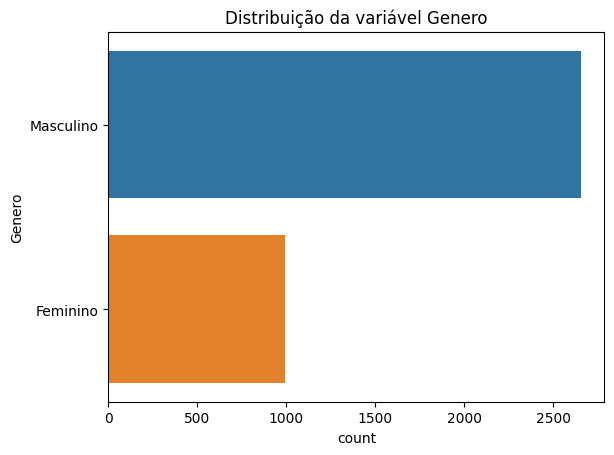

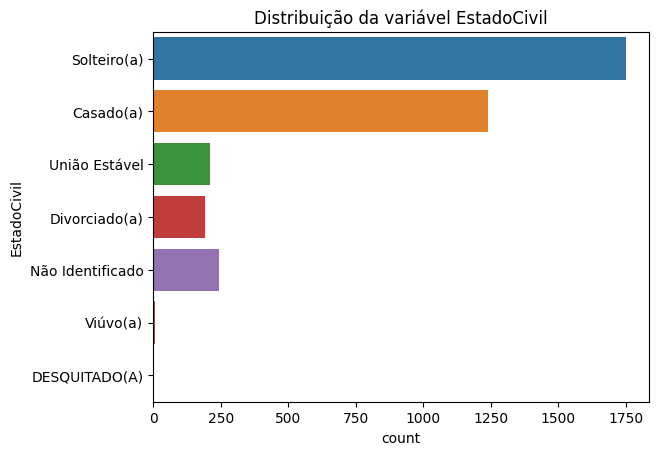

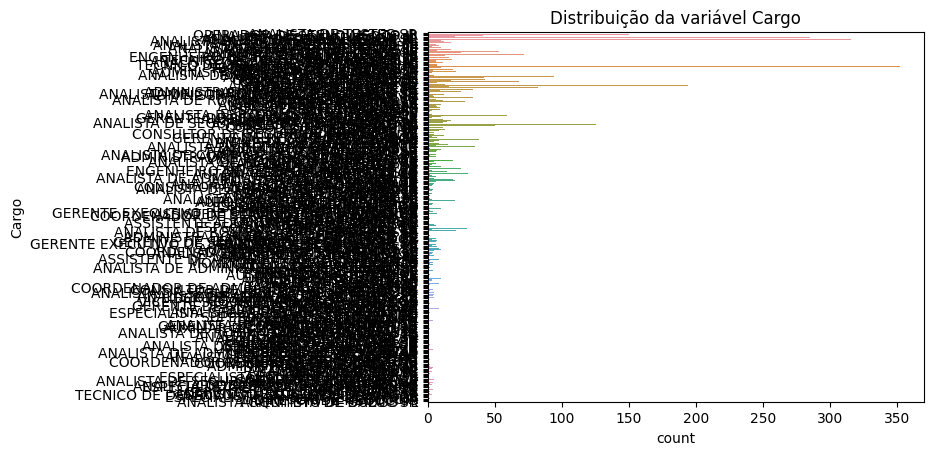

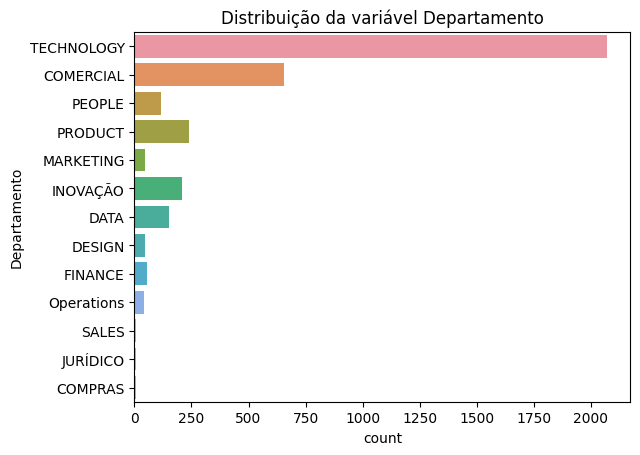

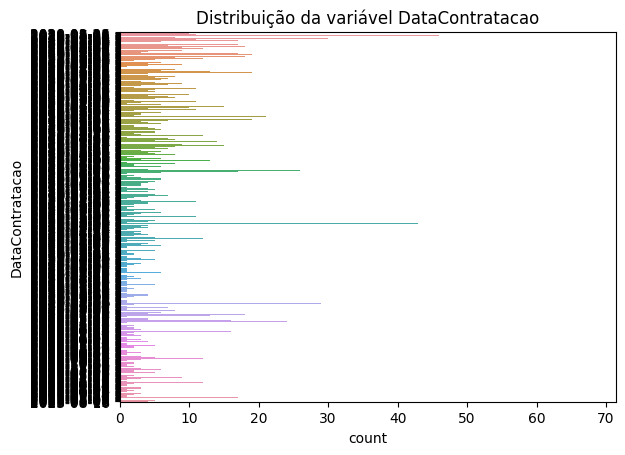

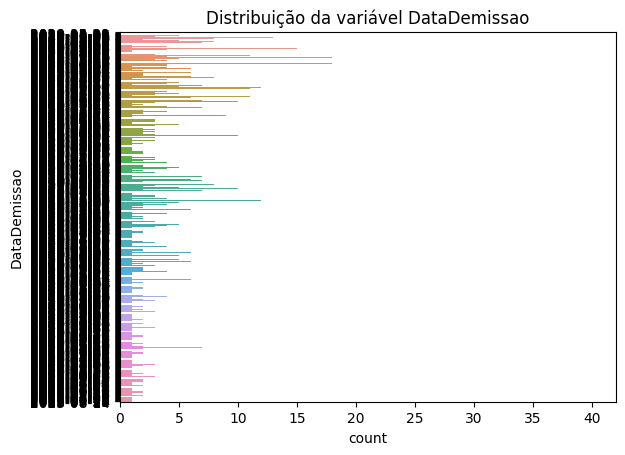

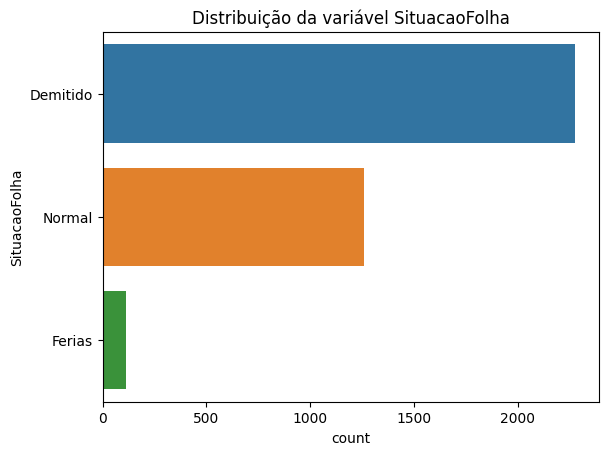

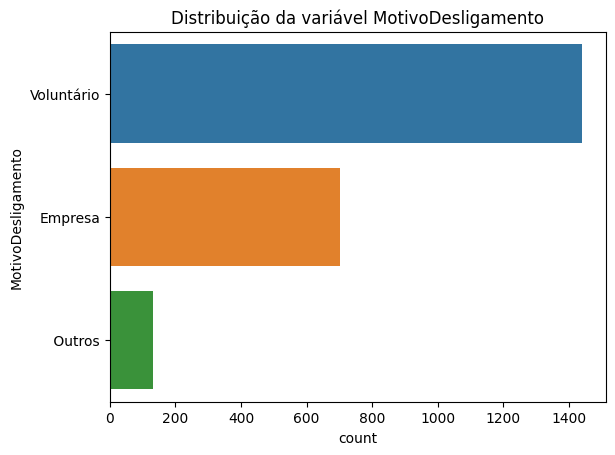

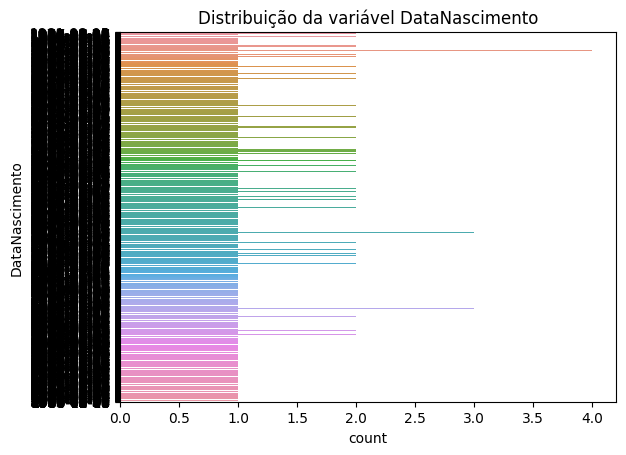

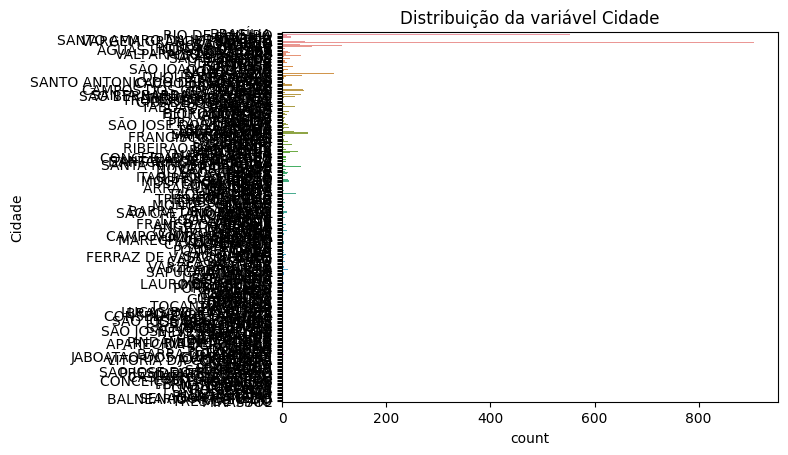

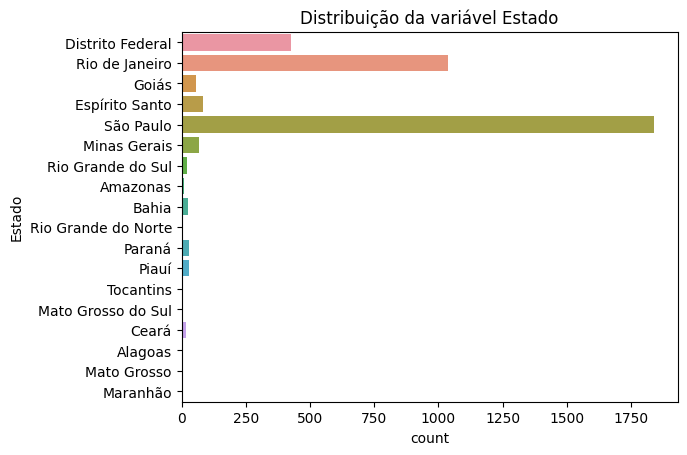

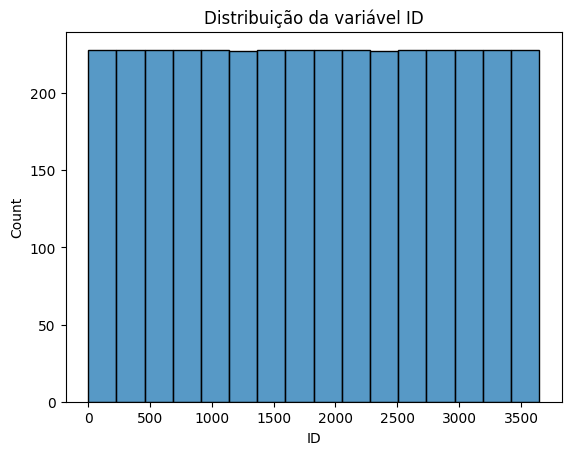

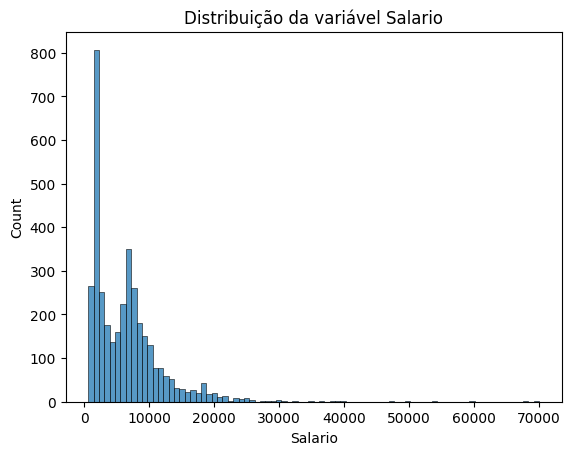

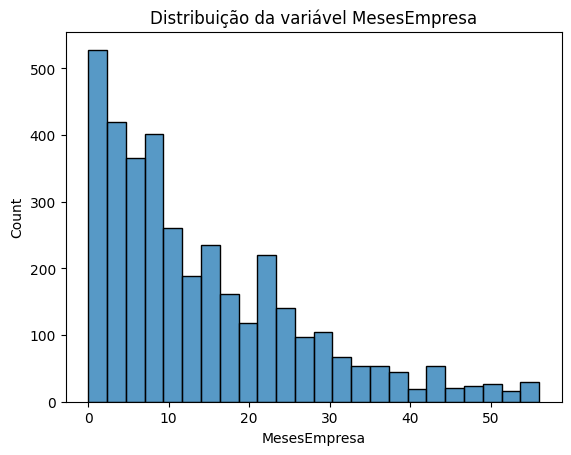

In [ ]:
# Análise demográfica dos colaboradores

# Variáveis categóricas:

for coluna in colaboradores.select_dtypes(include=['object', 'category']).columns:
  plt.figure()
  sns.countplot(data=colaboradores, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

# Variáveis numéricas
for coluna in colaboradores.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(colaboradores[coluna])
    plt.title(f'Distribuição da variável {coluna}')
    plt.show()


### Análise da Base de Colaboradores

Após uma rápida análise da base de colaboradores, foi possível observar as seguintes características predominantes:

- **Gênero**: O número de mulheres é menos da metade do número de homens presentes na base.
  
- **Estado Civil**: Há uma maior quantidade de colaboradores solteiros em comparação com os casados.

- **Departamento**: A maioria dos colaboradores está alocada no departamento de Technology.

- **Status de Emprego**: A maior parte da base de dados é composta por funcionários que foram demitidos.

- **Tipo de Desligamento**: Quase o dobro dos desligamentos aconteceu por iniciativa dos próprios colaboradores, em contraste com desligamentos iniciados pela empresa.

- **Localização**: A maioria dos colaboradores reside em São Paulo e no Rio de Janeiro.

- **Salário**: A distribuição salarial mostra que a maioria ganha até 10 mil. No entanto, existe uma parcela de colaboradores com salários entre 10 e 20 mil a ser considerada.


In [ ]:
colaboradores["Salario"].describe()

count     3646.000000
mean      6405.717246
std       5560.291653
min        584.210000
25%       2071.010000
50%       5821.430000
75%       8500.000000
max      70000.000000
Name: Salario, dtype: float64

In [ ]:
# Analisando salários outliers

# Determinando quartils e interquartil
Q1 = colaboradores["Salario"].quantile(0.25)
Q3 = colaboradores["Salario"].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites inferiores e superiores
l_inferior = Q1 - 1.5 * IQR
l_superior = Q3 + 1.5 * IQR

# Anunciando os limites
print(f"Salários abaixo de R${l_inferior: .2f} ou acima de R${l_superior: .2f} são outliers")

# Porcentagem de outliers
outliers = colaboradores[(colaboradores["Salario"] < l_inferior) | (colaboradores["Salario"] > l_superior)]
print(f"A porcentagem de outliers é de: {len(outliers)/len(colaboradores) * 100: .2f}%")

Salários abaixo de R$-7572.48 ou acima de R$ 18143.49 são outliers
A porcentagem de outliers é de:  3.89%


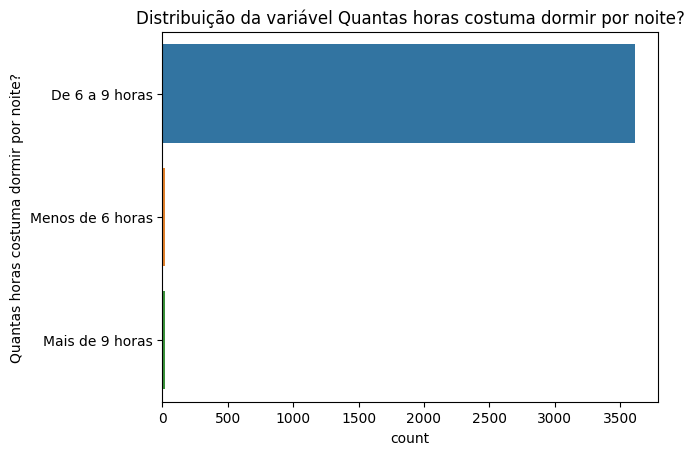

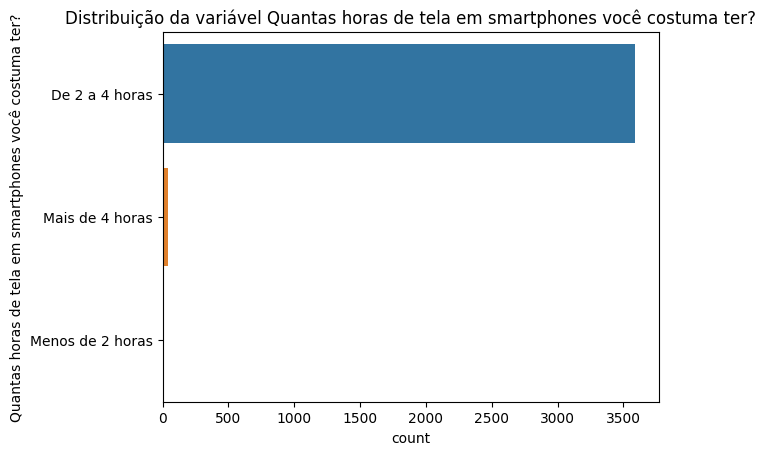

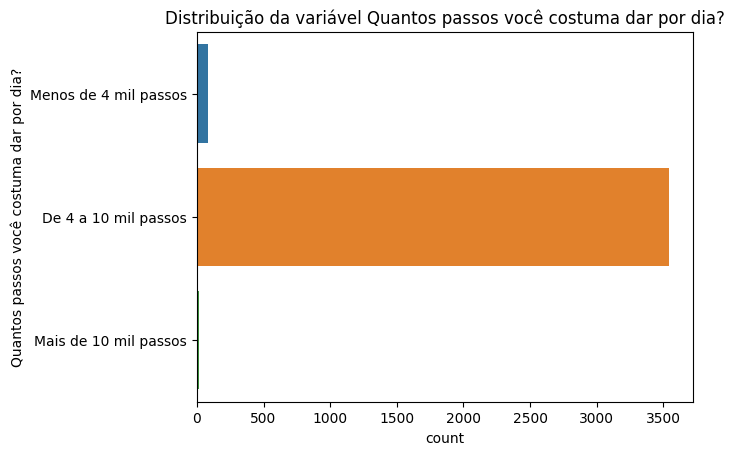

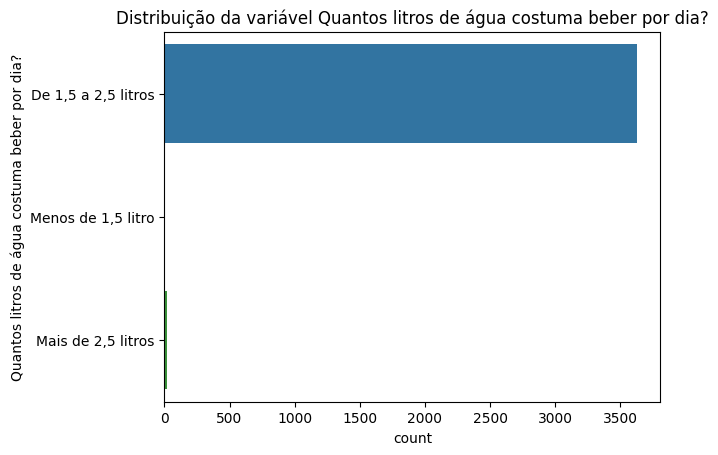

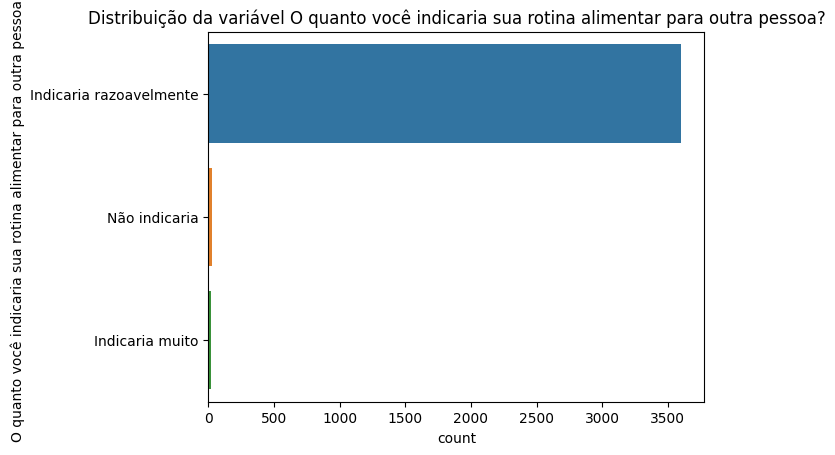

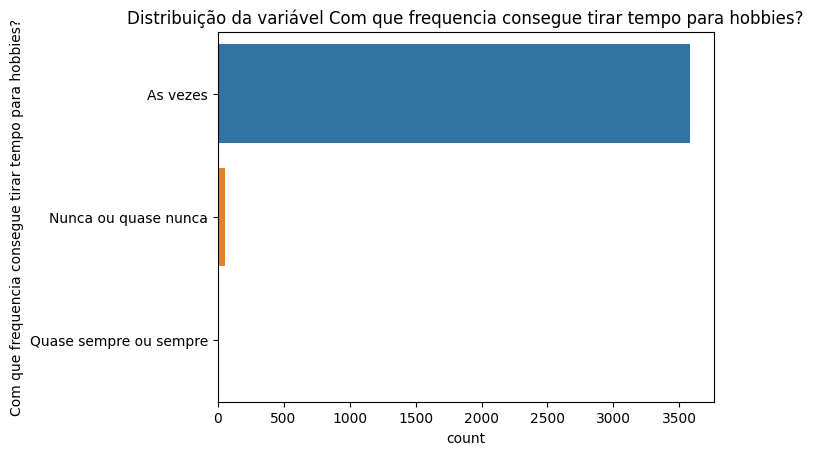

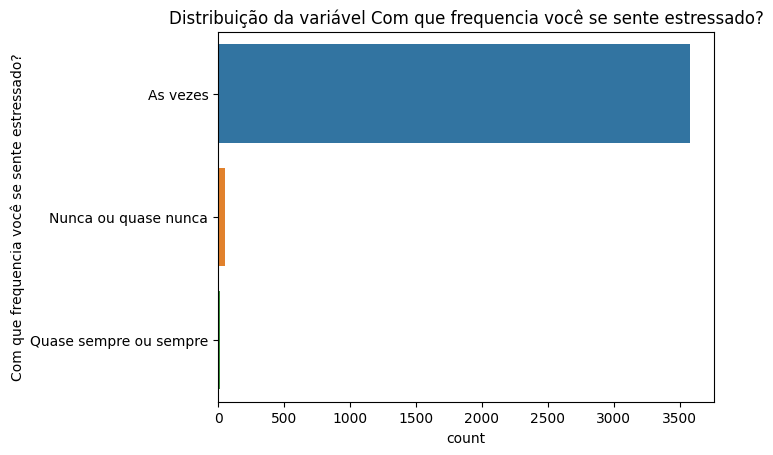

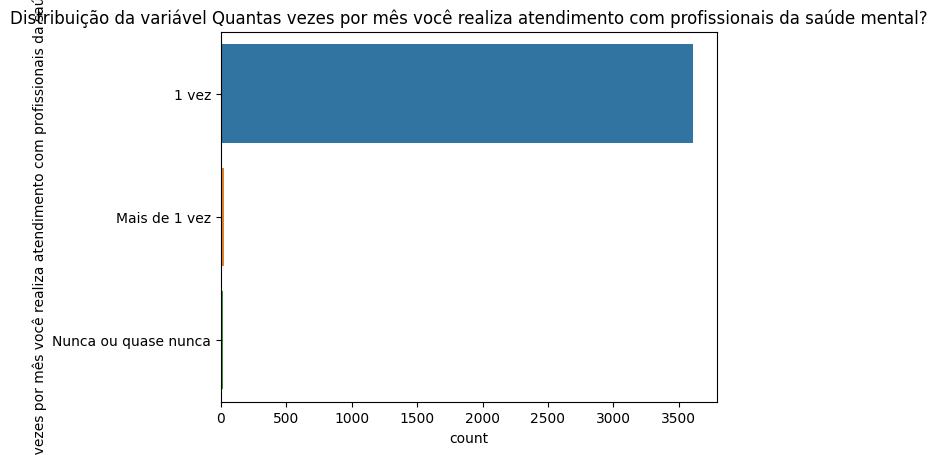

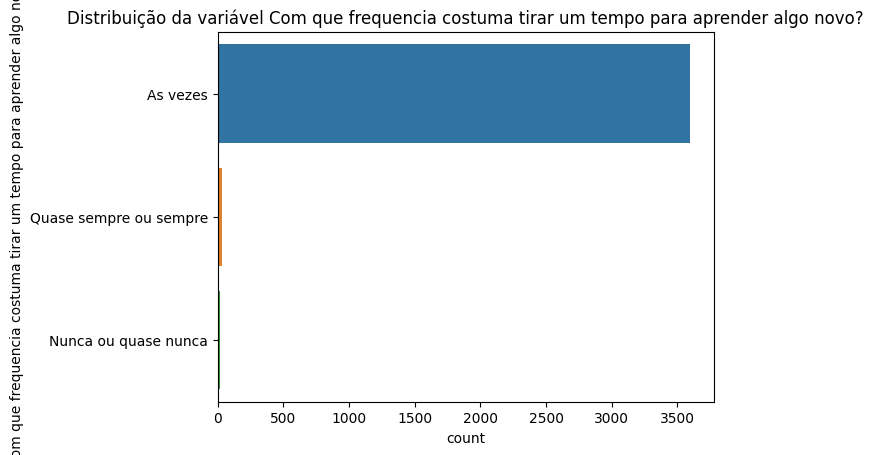

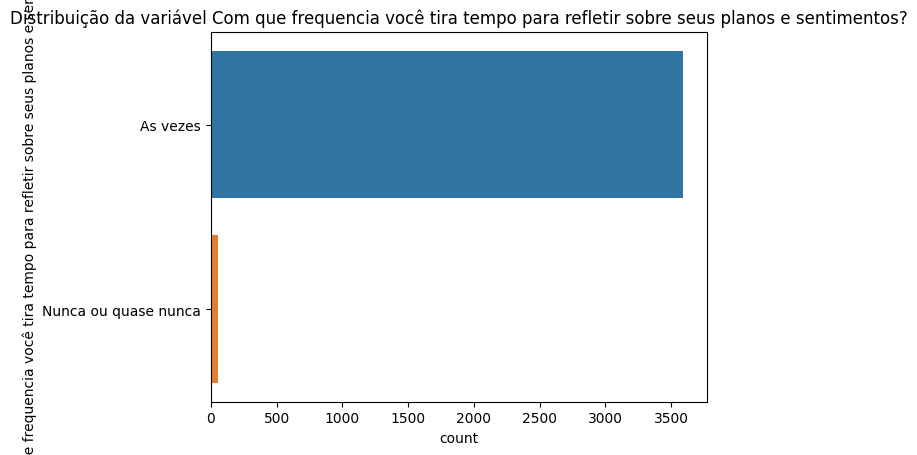

In [ ]:
# Hábitos

# Variáveis categóricas:

for coluna in habitos.select_dtypes(include=['object', 'category']).columns:
  plt.figure()
  sns.countplot(data=habitos, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

### Análise de Hábitos dos Colaboradores

Após uma análise rápida da base de hábitos dos colaboradores, podemos observar que:

- **Quase todos dormem entre 6 e 9 horas**
- **Quase todos passam entre 2 e 4 horas em seus smartphones**
- **Quase todos caminham entre 4k e 10k passos por dia**
- **Quase todos bebem de 1,5 a 2,5 litros de água por dia**
- **A maioria indicaria razoavelmente sua rotina alimentar a outros**
- **Na maior parte do tempo, conseguem dedicar momentos para seus hobbies**
- **Frequentemente se sentem estressados**
- **Quase todos realizam atendimento com profissionais de saúde mental uma vez por mês**
- **Costumam reservar algum tempo para aprender algo novo ocasionalmente**
- **Ocasionalmente param para refletir sobre seus planos e sentimentos**


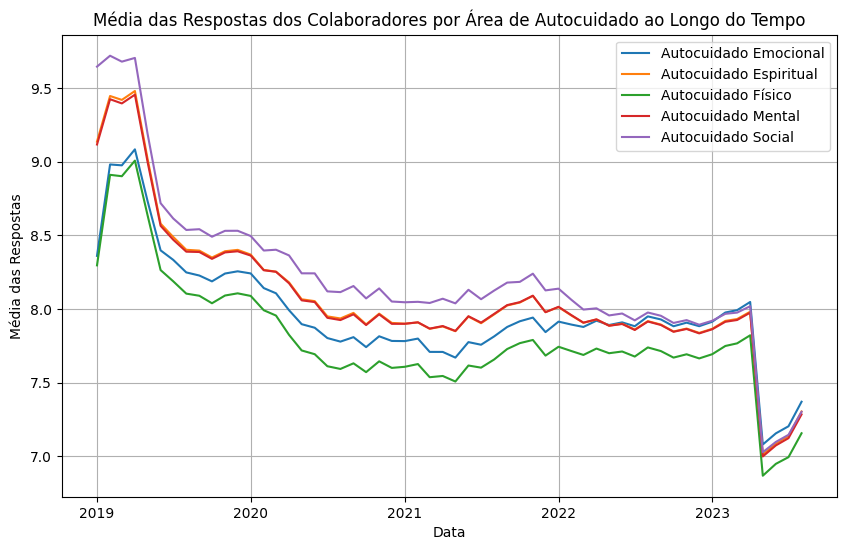

In [ ]:
# Respostas

# Média das repostas dos colaboradores por área do autocuidado ao longo do tempo

# Unindo perguntas e respostas
dados = pd.merge(respostas, perguntas, left_on="IdPergunta", right_on="ID")

# Agrupando por nota média por área de autocuidado
agrupamento = dados.groupby(["DT", "Categoria"])["Nota"].mean().reset_index()

# Criand um gráfico de linha para mostrar a média das respostas ao longo do tempo
plt.figure(figsize=(10,6))
for area in agrupamento['Categoria'].unique():
    area_data = agrupamento[agrupamento['Categoria'] == area]
    plt.plot(area_data['DT'], area_data['Nota'], label=area)

# Adicione rótulos e uma legenda
plt.xlabel('Data')
plt.ylabel('Média das Respostas')
plt.legend()
plt.title('Média das Respostas dos Colaboradores por Área de Autocuidado ao Longo do Tempo')
plt.grid(True)

# Mostre o gráfico
plt.show()


Aparentamente, as notas para as áreas de autocuidado tem sido **cada vez menores** ao longo do tempo. Especificamente, depois de algum momento em **2023, as médias caíram muito**, mas aparentam estar voltando ao patamar que estavam.

### Analisando Afastamentos

In [ ]:
# Afastamentos
afastamentos.head()

,ID,Id_Colaborador,CID,Data_Inicio_Afastamento,Data_Fim_Afastamento,descrição_cid,Dias_Afastamento
0,1,170,Z73.0,2019-01-10,2019-10-27,Esgotamento,290
1,2,1784,Z73.0,2019-09-01,2019-07-06,Esgotamento,-57
2,3,1694,Z73.0,2019-08-29,2019-08-16,Esgotamento,-13
3,4,32,Z73.0,2019-08-30,2019-10-26,Esgotamento,57
4,5,1702,Z73.0,2019-07-03,2019-04-30,Esgotamento,-64


Um passo importante de limpeza da tabela **afastamentos** era checar a integridade entre as datas de afastamentos. Num dataset normal, espera-se sempre que a data de fim aconteça **depois** da data do início.

In [ ]:
# Calculando a porcentagem de valores positivos
porc_positivos = (afastamentos['Dias_Afastamento'] > 0).mean() * 100

# Calculando a porcentagem de valores negativos
porc_negativos = (afastamentos['Dias_Afastamento'] < 0).mean() * 100

print(f"Porcentagem de valores positivos: {porc_positivos:.2f}%")
print(f"Porcentagem de valores negativos: {porc_negativos:.2f}%")


Porcentagem de valores positivos: 55.24%
Porcentagem de valores negativos: 44.49%


Boa parte dos dados na tabela **afastamentos** parece discrepante! Antes de qualquer coisa, vou tentar dar uma olhada nos dados observando outras variáveis como as datas de contratação, demissão, setor, situação de folha, etc.

In [ ]:
# Criando o dataset afastamentos negativos
afastamentos_negativos = afastamentos[afastamentos['Dias_Afastamento'] < 0]

# Unindo com a tabela colaboradores para observar outras variáveis
colaboradores_afastamentos_negativos = pd.merge(afastamentos_negativos, colaboradores, left_on="Id_Colaborador", right_on="ID")
colaboradores_afastamentos_negativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_x                     658 non-null    int64  
 1   Id_Colaborador           658 non-null    int64  
 2   CID                      658 non-null    object 
 3   Data_Inicio_Afastamento  658 non-null    object 
 4   Data_Fim_Afastamento     658 non-null    object 
 5   descrição_cid            658 non-null    object 
 6   Dias_Afastamento         658 non-null    int64  
 7   ID_y                     658 non-null    int64  
 8   Genero                   658 non-null    object 
 9   EstadoCivil              658 non-null    object 
 10  Cargo                    658 non-null    object 
 11  Departamento             658 non-null    object 
 12  DataContratacao          658 non-null    object 
 13  DataDemissao             342 non-null    object 
 14  SituacaoFolha            6

In [ ]:
# Analisando as datas
colaboradores_afastamentos_negativos[['Id_Colaborador', 'DataContratacao', 'Data_Inicio_Afastamento',
                                      'Data_Fim_Afastamento',  'DataDemissao', 'Dias_Afastamento']].head()

,Id_Colaborador,DataContratacao,Data_Inicio_Afastamento,Data_Fim_Afastamento,DataDemissao,Dias_Afastamento
0,1784,2019-03-11,2019-09-01,2019-07-06,2019-04-17,-57
1,1784,2019-03-11,2019-12-16,2019-06-10,2019-04-17,-189
2,1694,2019-05-02,2019-08-29,2019-08-16,2019-12-02,-13
3,1702,2019-09-09,2019-07-03,2019-04-30,NaT,-64
4,1702,2019-09-09,2019-10-06,2019-08-02,NaT,-65


**Aparentemente**, há registros de colaboradores afastados mesmo antes de terem sido contratados. Esses afastamentos não parecem consistentes.

Haveria colaboradores com mais de um afastamento?

In [ ]:
# Agrupando os dados e contando o número de afastamentos para cada colaborador
afastamentos_por_colaborador = afastamentos.groupby('Id_Colaborador').size()

# Encontrando colaboradores com mais de um afastamento
colaboradores_com_mais_de_um_afastamento = afastamentos_por_colaborador[afastamentos_por_colaborador > 1]

# Calculando o número e a porcentagem de colaboradores com mais de um afastamento
numero_colaboradores_com_mais_de_um_afastamento = len(colaboradores_com_mais_de_um_afastamento)
porcentagem_colaboradores_com_mais_de_um_afastamento = (numero_colaboradores_com_mais_de_um_afastamento / len(afastamentos_por_colaborador)) * 100

print(f'Número de colaboradores com mais de um afastamento: {numero_colaboradores_com_mais_de_um_afastamento}')
print(f'Porcentagem de colaboradores com mais de um afastamento: {porcentagem_colaboradores_com_mais_de_um_afastamento:.2f}%')


Número de colaboradores com mais de um afastamento: 243
Porcentagem de colaboradores com mais de um afastamento: 83.79%


Ok, há colaboradores com mais de um afastamento.

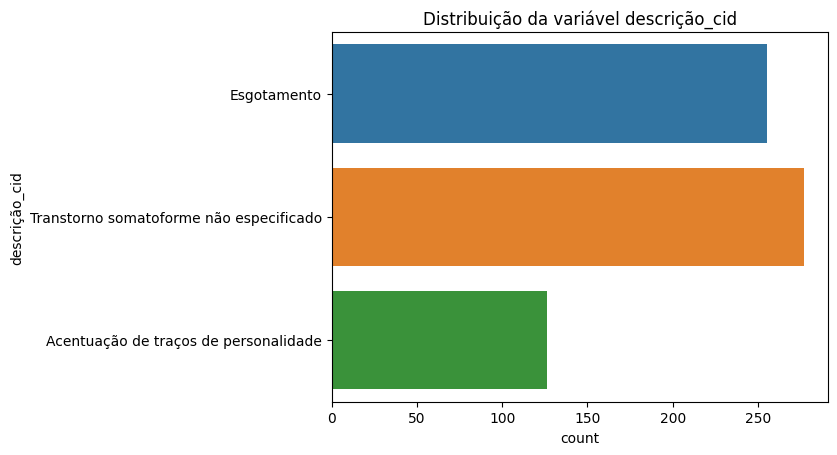

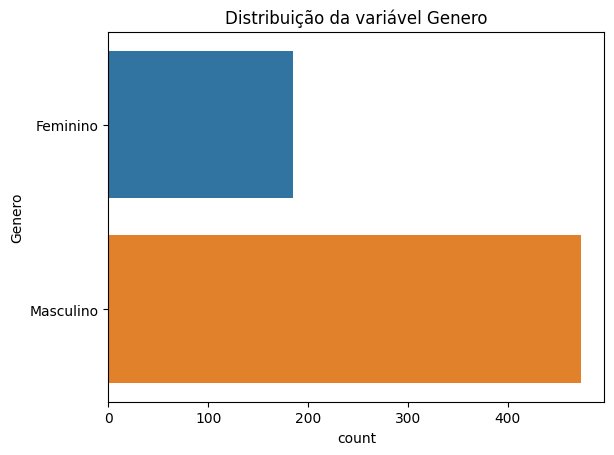

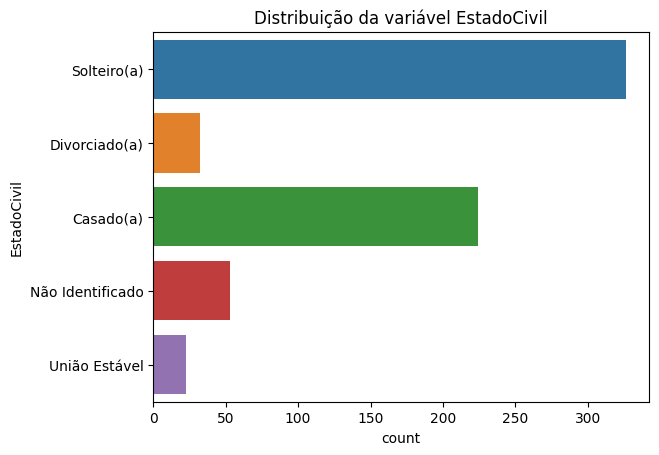

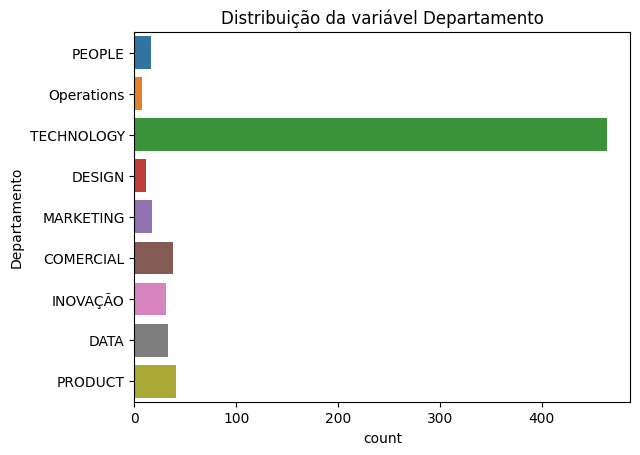

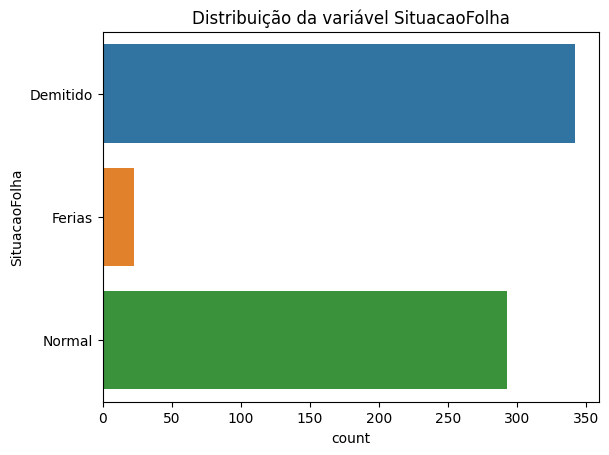

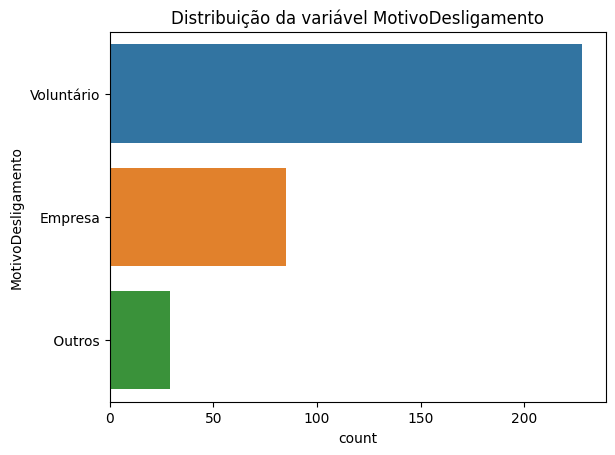

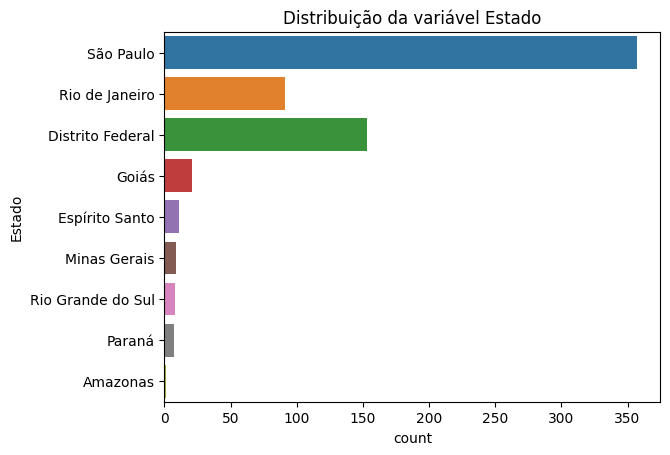

In [ ]:
# Analisando a distribuição dos afastamentos negativos:

# Criando variáveis categóricas
variaveis_categóricas = ["descrição_cid", "Genero", "EstadoCivil", "Departamento",
                          "SituacaoFolha", "MotivoDesligamento", "Estado"]
# Mostrando as visualizações
for coluna in colaboradores_afastamentos_negativos[variaveis_categóricas]:
  plt.figure()
  sns.countplot(data=colaboradores_afastamentos_negativos, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

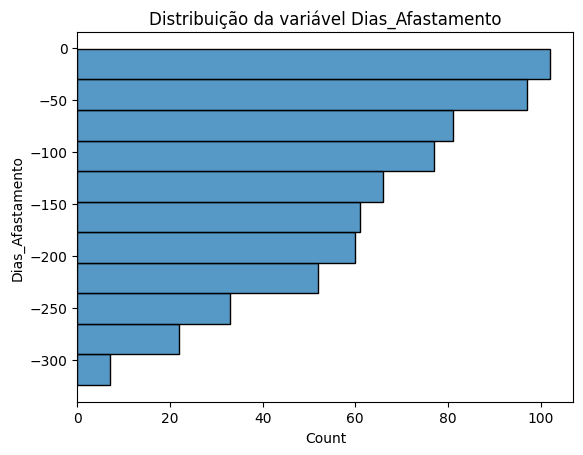

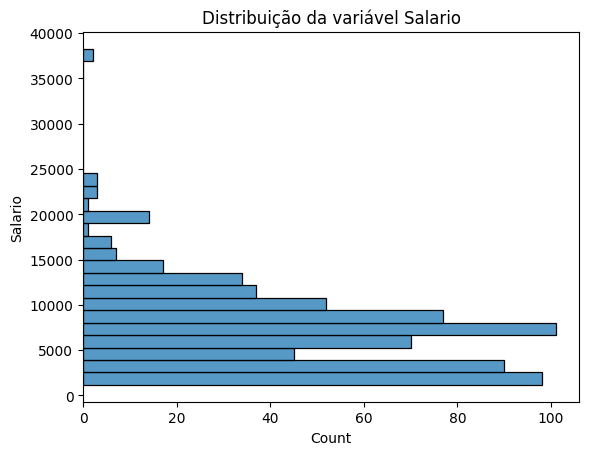

In [ ]:
# Criando variáveis numéricas
variaveis_numericas = ["Dias_Afastamento", "Salario"]

# Mostrando as visualizações
for coluna in colaboradores_afastamentos_negativos[variaveis_numericas]:
  plt.figure()
  sns.histplot(data=colaboradores_afastamentos_negativos, y=coluna)
  plt.title(f'Distribuição da variável {coluna}')
  plt.show()

Não vejo mais nada influenciando os afastamentos negativos. Vou começar contablizando quantos afastamentos ocorream antes da data de contratação do colaborador e então removê-los da base.

In [ ]:
# Quantos afastamentos ocorreram antes da data de contratação?
erros = colaboradores_afastamentos_negativos[colaboradores_afastamentos_negativos['Data_Inicio_Afastamento'] <
                                     colaboradores_afastamentos_negativos["DataContratacao"]]
print(f"Houveram {len(erros)} afastamentos antes da data de contratação")

# Armazenando os IDs desses afastamentos
ids_remover = erros["ID_x"].unique()

# Removendo da tabela afastamentos
afastamentos = afastamentos[~afastamentos["ID"].isin(ids_remover)]

Houveram 65 afastamentos antes da data de contratação


In [ ]:
# Quantos afastamentos ocorreram depois da data de demissão?
erros = colaboradores_afastamentos_negativos[colaboradores_afastamentos_negativos['Data_Fim_Afastamento'] >
                                     colaboradores_afastamentos_negativos["DataDemissao"]]
print(f"Houveram {len(erros)} afastamentos depois da data de demissao")

# Armazenando os IDs desses afastamentos
ids_remover = erros["ID_x"].unique()

# Removendo da tabela afastamentos
afastamentos = afastamentos[~afastamentos["ID"].isin(ids_remover)]

Houveram 86 afastamentos depois da data de demissao


In [ ]:
# Calculando a porcentagem de valores positivos
porc_positivos = (afastamentos['Dias_Afastamento'] > 0).mean() * 100

# Calculando a porcentagem de valores negativos
porc_negativos = (afastamentos['Dias_Afastamento'] < 0).mean() * 100

print(f"Porcentagem de valores positivos: {porc_positivos:.2f}%")
print(f"Porcentagem de valores negativos: {porc_negativos:.2f}%")

Porcentagem de valores positivos: 61.52%
Porcentagem de valores negativos: 38.18%


Numa **futura análise**, analisarei as tendências entre respostas e hábitos e respostas e afastamentos. Por hora, terminarei a limpeza básica e importarei os dados no Power BI

In [ ]:
# Filtrando tabela afastamentos
afastamentos = afastamentos[afastamentos["Dias_Afastamento"] > 0]

In [ ]:
# Agrupando afastamentos por colaborador
afastamentos_colaborador = afastamentos[["Id_Colaborador",
                                         "ID"]].groupby("Id_Colaborador").count().rename(columns={"ID": "Afastamentos"})

In [ ]:
# Primeiro, vamos resetar o índice da sua tabela afastamentos_colaborador para podermos unir baseando-se no índice
afastamentos_colaborador_reset = afastamentos_colaborador.reset_index()

# Agora vamos unir as tabelas usando um left merge
colaboradores = colaboradores.merge(afastamentos_colaborador_reset, how='left', left_on='ID', right_on='Id_Colaborador')

# Por fim, vamos preencher os valores NA (os colaboradores que não tiveram afastamentos) com 0
colaboradores

,ID,Genero,EstadoCivil,Cargo,Departamento,DataContratacao,DataDemissao,SituacaoFolha,MotivoDesligamento,DataNascimento,Salario,Cidade,Estado,MesesEmpresa,Id_Colaborador,Afastamentos
0,1,Masculino,Solteiro(a),ANALISTA DE TESTES SR,TECHNOLOGY,2020-08-06,2020-12-01,Demitido,Voluntário,1981-08-05,6000.00,BRASÍLIA,Distrito Federal,4,NaN,NaN
1,2,Masculino,Casado(a),OPERADOR DE ATENDIMENTO JR,COMERCIAL,2020-01-21,2020-05-20,Demitido,Empresa,1967-07-21,1300.00,RIO DE JANEIRO,Rio de Janeiro,4,NaN,NaN
2,3,Masculino,Solteiro(a),ANALISTA DESENVOLVEDOR III,TECHNOLOGY,2021-07-05,2022-04-22,Demitido,Voluntário,1986-09-26,7000.00,GOIANIA,Goiás,10,3.0,1.0
3,4,Masculino,Casado(a),TECNICO DE TELECOM PL,COMERCIAL,2021-09-13,NaT,Normal,NaN,1970-10-18,2060.64,VITÓRIA,Espírito Santo,24,4.0,3.0
4,5,Masculino,Casado(a),ANALISTA DESENVOLVEDOR SR,TECHNOLOGY,2019-01-21,2019-11-01,Demitido,Empresa,1971-01-26,6422.09,RIO DE JANEIRO,Rio de Janeiro,9,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,3642,Feminino,Solteiro(a),ANALISTA UX/UI DESIGN SR,DESIGN,2023-08-21,NaT,Normal,NaN,1994-02-03,7000.00,CURITIBA,Paraná,1,NaN,NaN
3642,3643,Feminino,Casado(a),ANALISTA DE TESTES SR,TECHNOLOGY,2023-08-21,NaT,Normal,NaN,1993-12-03,8500.00,CAJAMAR,São Paulo,1,NaN,NaN
3643,3644,Masculino,Divorciado(a),ANALISTA DESENVOLVEDOR SR,TECHNOLOGY,2023-08-21,NaT,Normal,NaN,1980-03-04,9000.00,MIRASSOL,São Paulo,1,NaN,NaN
3644,3645,Feminino,Casado(a),ANALISTA DE TESTES SR,TECHNOLOGY,2023-08-21,NaT,Normal,NaN,1980-05-10,9000.00,BARUERI,São Paulo,1,NaN,NaN


In [ ]:
colaboradores.drop("Id_Colaborador", axis=1, inplace=True)

In [ ]:
colaboradores.rename(columns={"Afastamentos": "NumeroAfastamentos"}, inplace=True)

In [ ]:
colaboradores['NumeroAfastamentos'] = colaboradores['NumeroAfastamentos'].fillna(0)

In [ ]:
colaboradores['NumeroAfastamentos'] = colaboradores['NumeroAfastamentos'].astype("int")

In [ ]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3646 entries, 0 to 3645
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3646 non-null   int64  
 1   Genero              3646 non-null   object 
 2   EstadoCivil         3646 non-null   object 
 3   Cargo               3646 non-null   object 
 4   Departamento        3646 non-null   object 
 5   DataContratacao     3646 non-null   object 
 6   DataDemissao        2280 non-null   object 
 7   SituacaoFolha       3646 non-null   object 
 8   MotivoDesligamento  2275 non-null   object 
 9   DataNascimento      3646 non-null   object 
 10  Salario             3646 non-null   float64
 11  Cidade              3403 non-null   object 
 12  Estado              3646 non-null   object 
 13  MesesEmpresa        3646 non-null   int64  
 14  NumeroAfastamentos  3646 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 455.8

In [ ]:
colaboradores = colaboradores[~colaboradores["ID"].isin(ids_para_remover)]

In [ ]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 3645
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3634 non-null   int64  
 1   Genero              3634 non-null   object 
 2   EstadoCivil         3634 non-null   object 
 3   Cargo               3634 non-null   object 
 4   Departamento        3634 non-null   object 
 5   DataContratacao     3634 non-null   object 
 6   DataDemissao        2273 non-null   object 
 7   SituacaoFolha       3634 non-null   object 
 8   MotivoDesligamento  2268 non-null   object 
 9   DataNascimento      3634 non-null   object 
 10  Salario             3634 non-null   float64
 11  Cidade              3393 non-null   object 
 12  Estado              3634 non-null   object 
 13  MesesEmpresa        3634 non-null   int64  
 14  NumeroAfastamentos  3634 non-null   int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 454.2

In [ ]:
!pip install openpyxl

In [ ]:
colaboradores.to_excel('colaboradores.xlsx', index=False)


In [ ]:
from google.colab import files
files.download('colaboradores.xlsx')


In [ ]:
afastamentos[afastamentos["Id_Colaborador"].isin(ids_para_remover)]

In [ ]:
afastamentos.to_excel("afastamentos.xlsx", index=False)
files.download('afastamentos.xlsx')

In [ ]:
respostas.to_csv("respostas.txt", sep='\t', index=False)
files.download("respostas.txt")

In [ ]:
habitos = habitos[~habitos["ID"].isin(ids_para_remover)]

In [ ]:
habitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 3645
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   ID                                                                                 3634 non-null   int64 
 1   Quantas horas costuma dormir por noite?                                            3634 non-null   object
 2   Quantas horas de tela em smartphones você costuma ter?                             3634 non-null   object
 3   Quantos passos você costuma dar por dia?                                           3634 non-null   object
 4   Quantos litros de água costuma beber por dia?                                      3634 non-null   object
 5   O quanto você indicaria sua rotina alimentar para outra pessoa?                    3634 non-null   object
 6   

In [ ]:
habitos.to_excel("habitos.xlsx", index=False)
files.download("habitos.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
perguntas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         35 non-null     int64 
 1   Pergunta   35 non-null     object
 2   Categoria  35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes
